In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# **IMPORT DATASET**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datamining/cancer patient data sets.csv')

# **EKSPLORATION DATASET**

In [7]:
#Menampilkan 5 data teratas
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [8]:
#Melihat informasi secara detail mengenai dataset yang dimuiliki
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [10]:
#Mendeskripsikan dataset
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


# **DATA PRE-PROCESSING**

In [11]:
#Menghitung data kosong (missing value) masing-masing feature
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

Dikarenakan tidak ada data kosong (missing value), maka dilanjutkan ke proses selanjutnya, yaitu data Encoding

# **ENCODING**

In [16]:
#Merubah Low, Medium, High menjadi 1, 2, 3
num_level = {
    'Low' : 1,
    'Medium' : 2,
    'High' : 3
}
df['Level'] = df['Level'].map(num_level)

In [17]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,1
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,2
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,3
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,3
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,3


setelah melalukan pelabelan, selanjutnya akan dilihat korelasi antar feature dan dilakukan seleksi feature dengan Pearson Correlation Selection

# **SELEKSI FEATURE**

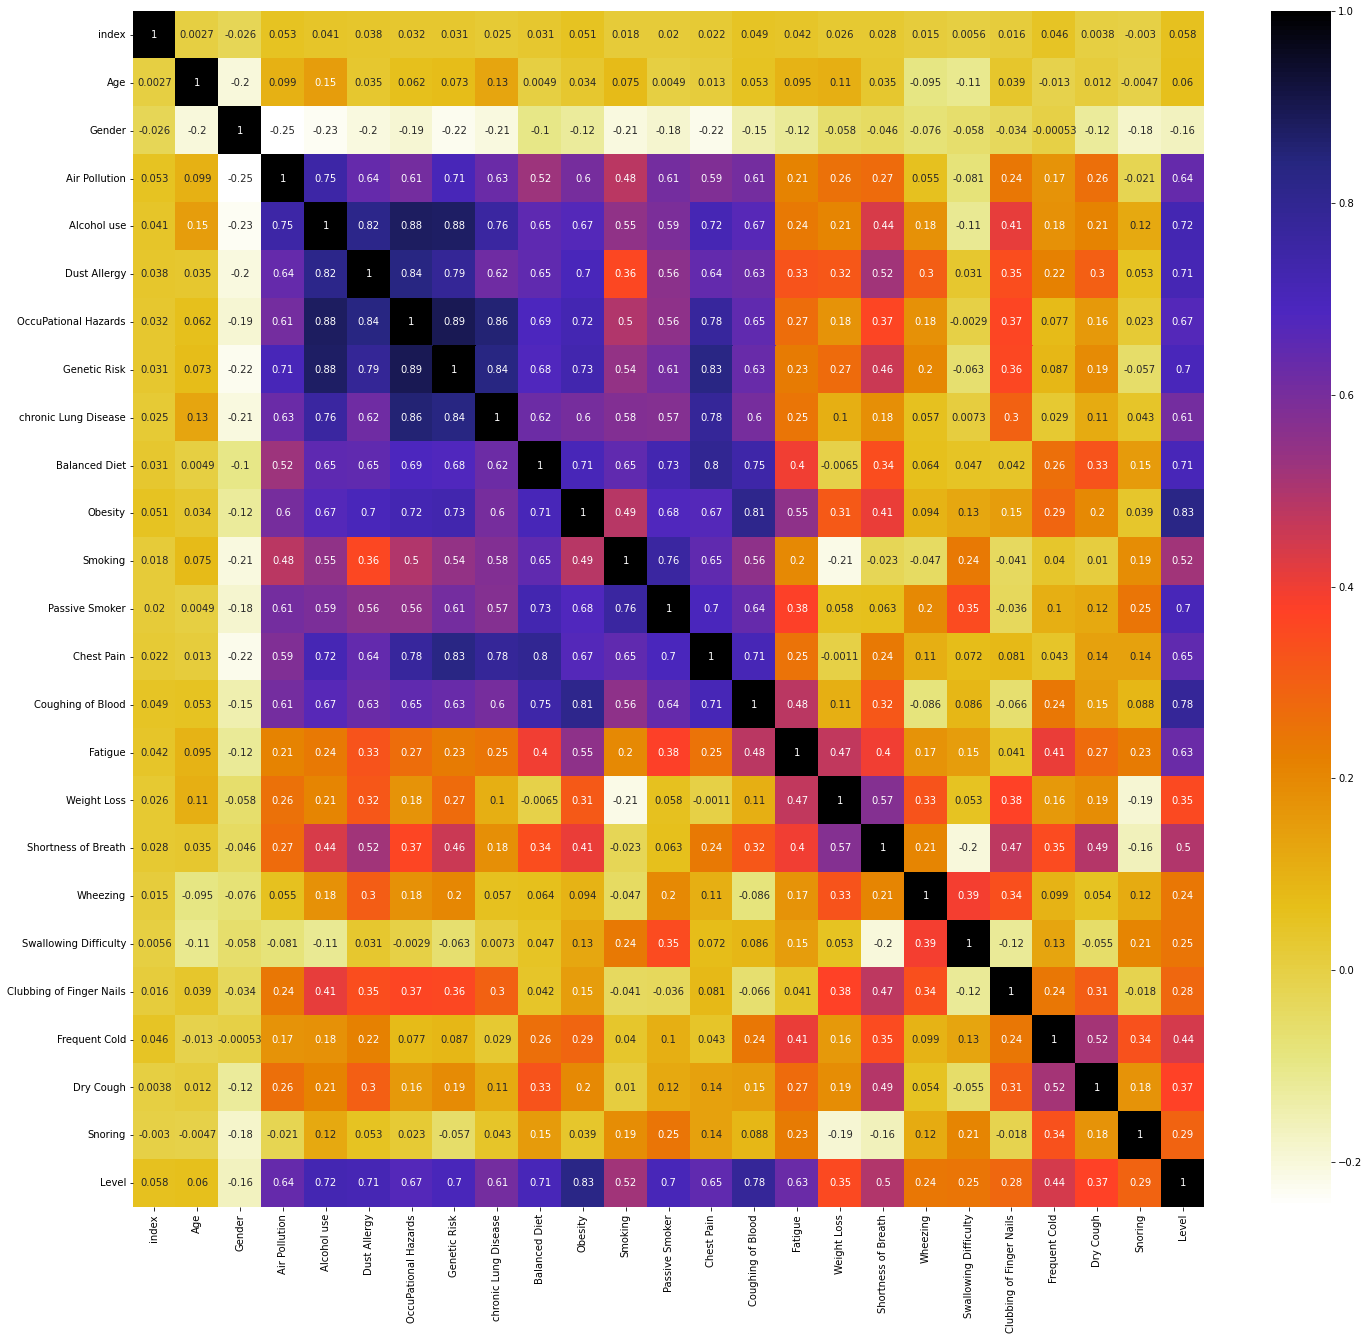

In [18]:
cor = df.corr()
plt.figure(figsize=(24,22))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

In [21]:
#Correlation with output variable
cor_target = abs(cor['Level']) 
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.6] # Korelasi mendekati 0 berarti lemah, mendekati 1 berarti kuat. Oleh karena itu saya memilih feature dengan korelasi > 0.6 
relevant_features

Air Pollution           0.636038
Alcohol use             0.718710
Dust Allergy            0.713839
OccuPational Hazards    0.673255
Genetic Risk            0.701303
chronic Lung Disease    0.609971
Balanced Diet           0.706273
Obesity                 0.827435
Passive Smoker          0.703594
Chest Pain              0.645461
Coughing of Blood       0.782092
Fatigue                 0.625114
Level                   1.000000
Name: Level, dtype: float64

In [22]:
#Menghapus column selain 'Air Pollution','Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk','chronic Lung Disease', 
# 'Balanced Diet', 'Obesity', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Level'
df.drop(df.columns.difference(['Air Pollution','Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk','chronic Lung Disease', 
                               'Balanced Diet', 'Obesity', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Level']), 1, inplace=True)
df.head()

<ipython-input-22-f66614bd8d1c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.columns.difference(['Air Pollution','Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk','chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Level']), 1, inplace=True)


,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Level
0,2,4,5,4,3,2,2,4,2,2,4,3,1
1,3,1,5,3,4,2,2,2,4,2,3,1,2
2,4,5,6,5,5,4,6,7,3,4,8,8,3
3,7,7,7,7,6,7,7,7,7,7,8,4,3
4,6,8,7,7,7,6,7,7,7,7,9,3,3


Setelah melakukan selection feature menggunakan metode Pearson Correlation, selanjutnya adalah melakukan model klasifikasi dengan KNN

# **DATA MODELLING**

In [23]:
#Data Split

#X adalah variabel independen - berisi 'Air Pollution','Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk','chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue'
x = df.iloc[:, :11].values

#y adalah variabel dependen - berisi Level
y = df.iloc[:, -1].values

In [26]:
#menampilkan nilai x dan y
print('X : \n',x[:5])
print('\ny : \n',y[:5])

X : 
 [[2 4 5 4 3 2 2 4 2 2 4]
 [3 1 5 3 4 2 2 2 4 2 3]
 [4 5 6 5 5 4 6 7 3 4 8]
 [7 7 7 7 6 7 7 7 7 7 8]
 [6 8 7 7 7 6 7 7 7 7 9]]

y : 
 [1 2 3 3 3]


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 21)

In [30]:
print('x_train :\n', x_train[:5])
print('\ny_train :\n', y_train[:5])

x_train :
 [[4 2 3 4 2 3 2 4 4 2 4]
 [6 8 7 7 7 6 7 7 7 7 9]
 [2 3 4 2 1 1 2 4 2 1 5]
 [2 1 5 3 2 3 2 4 4 2 4]
 [4 5 6 6 5 4 6 6 6 6 6]]

y_train :
 [1 3 1 2 2]


In [31]:
print('x_test :\n', x_test[:5])
print('\ny_test :\n', y_test[:5])

x_test :
 [[1 2 2 3 2 4 2 3 1 1 1]
 [3 2 1 3 2 1 3 2 2 2 2]
 [6 8 7 7 7 6 7 7 7 7 9]
 [6 8 7 7 7 6 7 7 8 7 7]
 [1 2 2 3 2 4 2 3 1 1 1]]

y_test :
 [1 1 3 3 1]


In [33]:
#KNN Algorithm
k = 3
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
knn

KNeighborsClassifier(n_neighbors=3)

In [34]:
hasil = knn.predict(x_test)

hasil

array([1, 1, 3, 3, 1, 2, 2, 1, 3, 1, 3, 2, 2, 2, 2, 1, 3, 2, 1, 3, 1, 1,
       2, 3, 3, 2, 3, 3, 2, 3, 2, 1, 3, 1, 1, 3, 1, 2, 2, 3, 1, 3, 2, 1,
       2, 2, 3, 3, 2, 1, 1, 1, 2, 2, 3, 2, 1, 1, 2, 2, 3, 3, 2, 2, 3, 2,
       1, 2, 3, 3, 1, 2, 1, 2, 1, 1, 2, 2, 1, 3, 1, 1, 3, 2, 2, 2, 3, 3,
       2, 2, 2, 3, 3, 3, 2, 1, 3, 1, 2, 3, 2, 3, 2, 1, 3, 3, 2, 1, 1, 2,
       3, 1, 1, 3, 1, 1, 2, 3, 1, 1, 2, 3, 3, 3, 1, 2, 3, 2, 3, 1, 3, 3,
       2, 2, 1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 2, 1, 1, 1, 2, 1, 2, 1, 3, 3,
       2, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 2, 3, 2, 1, 2, 3, 1, 3, 2, 3, 2,
       2, 2, 3, 1, 1, 2, 1, 2, 3, 3, 3, 1, 2, 3, 1, 1, 1, 1, 3, 2, 2, 1,
       2, 1, 3, 3, 3, 1, 3, 2, 3, 3, 3, 2, 1, 1, 2, 3, 1, 3, 2, 1, 1, 1,
       3, 2, 1, 2, 2, 2, 3, 2, 3, 1, 3, 1, 1, 2, 3, 2, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 1, 1, 2, 2,
       2, 2, 1, 3, 2, 1, 1, 3, 2, 3, 2, 3, 2, 1, 2, 2, 1, 2, 2, 3, 2, 2,
       1, 1, 1, 3, 3, 2, 3, 1, 1, 1, 2, 1, 3, 1])

#**PEMBUKTIAN EVALUASI MODEL DENGAN CONFUSSION MATRIX**

In [43]:
actual = y_test;
predicted =  knn.predict(x_test)

print('Accuracy_Score : ',accuracy_score(actual,predicted))
print('Recall_Score : ',recall_score(actual,predicted,average=None))
print('precision_Score : ',precision_score(actual,predicted,average=None))
print('F1_Score : ',f1_score(actual,predicted,average=None))
print('Report : \n',classification_report(actual,predicted))

Accuracy_Score :  1.0
Recall_Score :  [1. 1. 1.]
precision_Score :  [1. 1. 1.]
F1_Score :  [1. 1. 1.]
Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        98
           2       1.00      1.00      1.00       101
           3       1.00      1.00      1.00       101

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [44]:
actual = y_train;
predicted =  knn.predict(x_train)

print('Accuracy_Score : ',accuracy_score(actual,predicted))
print('Recall_Score : ',recall_score(actual,predicted,average=None))
print('precision_Score : ',precision_score(actual,predicted,average=None))
print('F1_Score : ',f1_score(actual,predicted,average=None))
print('Report : \n',classification_report(actual,predicted))

Accuracy_Score :  1.0
Recall_Score :  [1. 1. 1.]
precision_Score :  [1. 1. 1.]
F1_Score :  [1. 1. 1.]
Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       205
           2       1.00      1.00      1.00       231
           3       1.00      1.00      1.00       264

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


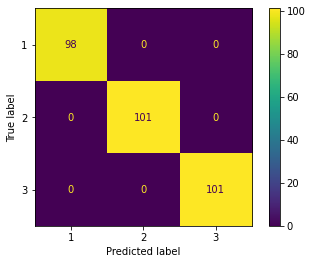

In [45]:
plot_confusion_matrix(knn, x_test, y_test)  
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


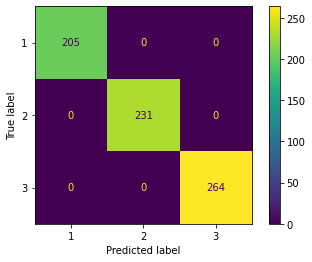

In [46]:
plot_confusion_matrix(knn, x_train, y_train)  
plt.show()